In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\Haris\Desktop\Python Files\DataFile.txt",names=['Size','Bed Rooms','Price in USD'])

In [4]:
df.head()       #house prices dataset

,Size,Bed Rooms,Price in USD
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


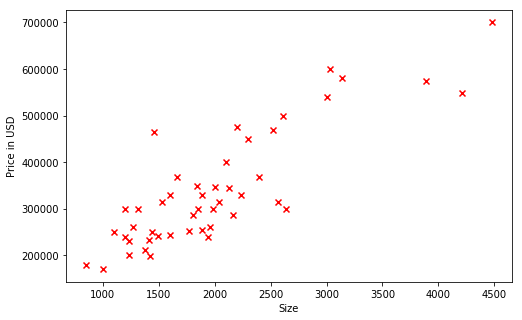

In [5]:
#here we will first visulaize both features effects on output
plt.figure(figsize=(8,5))
plt.scatter(df['Size'],df['Price in USD'],c='r',marker='x')
plt.xlabel('Size')
plt.ylabel('Price in USD')
plt.show()

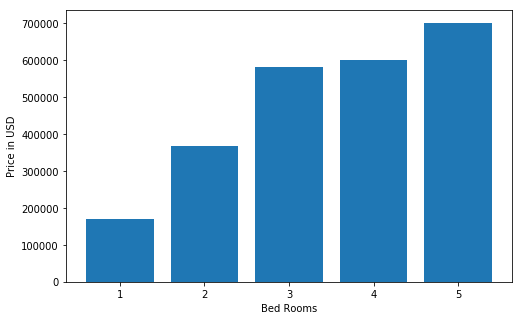

In [6]:
plt.figure(figsize=(8,5))
plt.bar(df['Bed Rooms'],df['Price in USD'])
plt.xlabel('Bed Rooms')
plt.ylabel('Price in USD')
plt.show()

PREDICTION:
\begin{equation}
h(x)= \theta_0x_0+\theta_1x_1+\theta_2x_2
\end{equation}
where x_0 is equal to 1

COST FUNCTION:
\begin{equation}
J(\theta)= \frac{1}{2m}\sum_{i=1}^{m} (h(x)-y)^2
\end{equation}
where $\theta=(\theta_0,\theta_1......\theta_n)$ and m is number of training examples

GRADIENT DESCENT FOR ADJUSTING PARAMETERS:
\begin{equation}
\theta_j=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}(h(x)-y)x_j
\end{equation}
where j is number of features and $\alpha$ is learning rate

In [31]:
X=np.array(df.loc[:,['Size','Bed Rooms']],dtype=float)
Y=np.array(df.loc[:,'Price in USD'],dtype=float)

In [8]:
#becuase of difference we perform normalization to scale our features
def features_scaling(X):
    X_norm=X
    mean=[]
    std=[]
    for i in range(X.shape[1]):
        mean.append(np.mean(X[:,i]))
        std.append(np.std(X[:,i]))
    for i in range(X.shape[1]):
        X_norm[:,i]=(X_norm[:,i]-mean[i])/std[i]
    return X_norm,mean,std

In [9]:
def cost_computation(X,y,theta):
    m=len(X)
    h_pred=np.dot(X,theta)                             #here np.dot performs the vector matrix multiplication
    diff=h_pred-y.reshape(m,1)
    diff=np.square(diff)                
    J_cost=(np.sum(diff))/(2*m)
    return J_cost    

In [10]:
def gradient_descent(X,y,theta,alpha,iterations):
    m=len(X)
    J_cost_list=[]
    J_cost=0
    for i in range(iterations): 
        h_pred=np.dot(X,theta)                             #h(x)=QT*x
        diff=h_pred-y.reshape(m,1)                         #h(x)-y
        diff=np.transpose(np.dot(np.transpose(diff),X))    #(h(x)-y)*x  #here transpose is applied for dimensions consistency
        theta=theta-((alpha/m)*diff)                       
        
        J_cost=cost_computation(X,y,theta)             
        J_cost_list.append(J_cost)                         #we record all costs to plot a graph and see the convergence
    return theta,J_cost_list

In [32]:
X_norm,means,stds=features_scaling(X)

In [33]:
#here we add the ones column for our x0
z=np.ones((X.shape[0],1))
X_norm=np.append(z,X_norm,axis=1) 

In [34]:
initial_theta=np.zeros((X_norm.shape[1],1))
initial_theta

array([[0.],
       [0.],
       [0.]])

In [35]:
new_theta,J_list=gradient_descent(X_norm,Y,initial_theta,0.01,1000)     #this will fit our data and return better thetas and cost

With above computed thetas we can predict our result for some input. We can improve accuracy by adjusting learning rat eor by increasing iterations. Finally cost list can be plotted to see the convergence and improve our accuracy

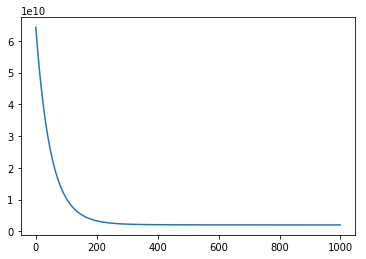

In [36]:
x=np.arange(len(J_list))
plt.plot(x,J_list)
plt.show()

The above plot indicates decrease in cost which shows the working of gradient descent as it tries to locate global optima.

Prediction when Size=1650sqft and Rooms=3

In [41]:
x=np.array([1650,3])
x_temp=(x-means)/stds                       #where means and stds are from the output of feature scaling function
x_temp=x_temp.reshape(1,2)
x_temp=np.append(np.ones((x_temp.shape[0],1)),x_temp,axis=1)
h=np.dot(x_temp,new_theta)
h=np.round(h.item(),2)
print('House with size 1650sqft and Rooms 3 will have a cost',h)

House with size 1650sqft and Rooms 3 will have a cost 293221.87
